Detection of fraudulent transactions(credit card)

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split 
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import time
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
import seaborn as sns
from sklearn.metrics import confusion_matrix

Credit card data from Kaggle (https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud)
It has 30 features including Amount and Time. Class variable captures whether the transaction is fraudulent or not(0/1)

In [3]:
credit_data= pd.read_csv('creditcard.csv')

In [4]:
credit_data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
credit_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
#data present
rows,columns = credit_data.shape
print("The dataset has",rows,"rows and", columns, "columns.")

The dataset has 284807 rows and 31 columns.


In [7]:
credit_data.isnull().values.any()

False

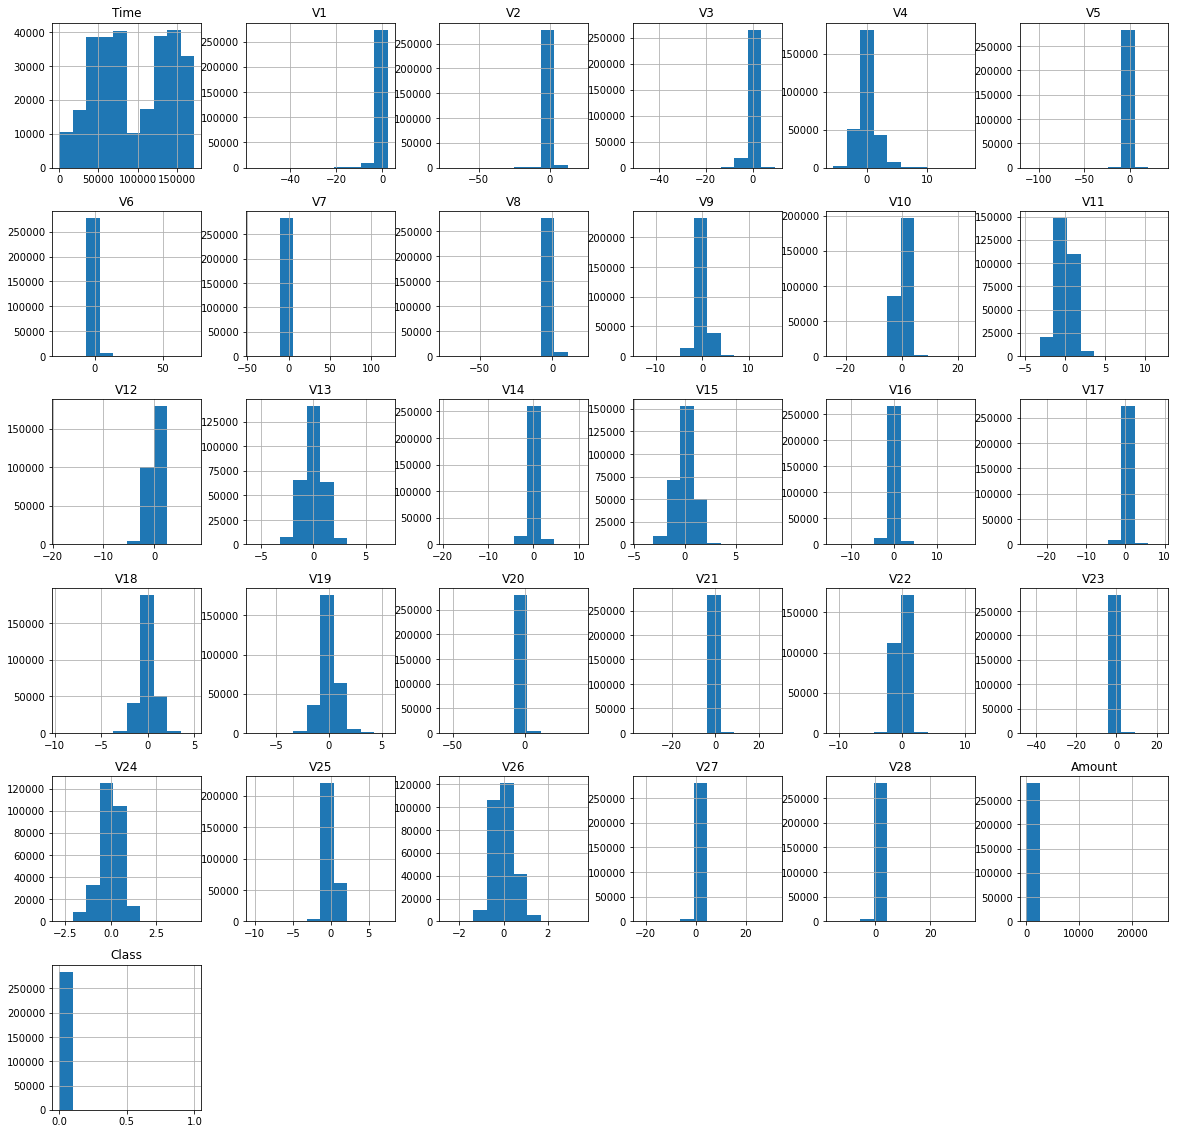

In [8]:
credit_data.hist(figsize=(20,20))
plt.show()

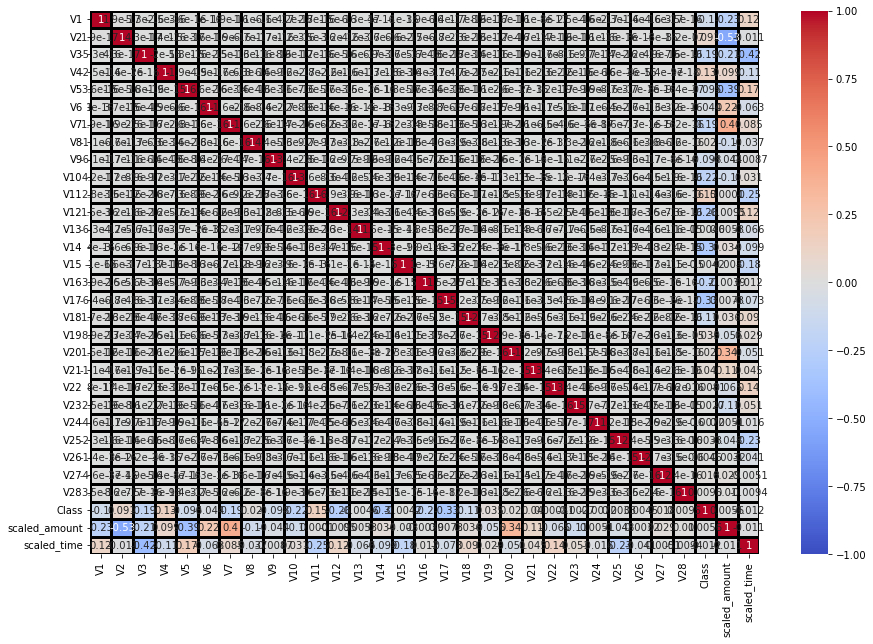

In [76]:
#Determining the coorelation between different attributes and analysing their features
plt.figure(figsize=(15, 10))   
sns.heatmap(credit_data.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', linewidths=3, linecolor='black')
plt.show()

Class has higher correlation with V1, V3, V4, V7, V10, V11, V12, V14, V17 

Scaling time and amount

In [9]:
scaler = StandardScaler()
credit_data['scaled_amount'] = scaler.fit_transform(credit_data['Amount'].values.reshape(-1,1))
credit_data['scaled_time'] = scaler.fit_transform(credit_data['Time'].values.reshape(-1,1))
credit_data.drop(['Time','Amount'], axis=1, inplace=True)

In [10]:
credit_data.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,2.848070e+05,2.848070e+05
mean,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,1.772925e-15,...,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,0.001727,3.202236e-16,-1.050379e-14
std,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,...,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,0.041527,1.000002e+00,1.000002e+00
min,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,...,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,-3.532294e-01,-1.996583e+00
25%,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,...,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,0.000000,-3.308401e-01,-8.552120e-01
50%,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,...,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,0.000000,-2.652715e-01,-2.131453e-01
75%,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,...,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,0.000000,-4.471707e-02,9.372174e-01
max,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,...,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,1.000000,1.023622e+02,1.642058e+00


Checking the imbalance in the data set since number of fraudulent txns should be << normal txns

In [11]:
Fraud_txns = credit_data[credit_data['Class']==1]
Normal_txns = credit_data[credit_data['Class']==0]

In [12]:
Fraud_txns.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
count,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,...,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.0,492.000000,492.000000
mean,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,-5.676883,...,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,1.0,0.135382,-0.296223
std,6.783687,4.291216,7.110937,2.873318,5.372468,1.858124,7.206773,6.797831,2.500896,4.897341,...,1.494602,1.579642,0.515577,0.797205,0.471679,1.376766,0.547291,0.0,1.026242,1.007313
min,-30.552380,-8.402154,-31.103685,-1.313275,-22.105532,-6.406267,-43.557242,-41.044261,-13.434066,-24.588262,...,-8.887017,-19.254328,-2.028024,-4.781606,-1.152671,-7.263482,-1.869290,1.0,-0.353229,-1.988034
25%,-6.036063,1.188226,-8.643489,2.373050,-4.792835,-2.501511,-7.965295,-0.195336,-3.872383,-7.756698,...,-0.533764,-0.342175,-0.436809,-0.314348,-0.259416,-0.020025,-0.108868,1.0,-0.349231,-1.128123
50%,-2.342497,2.717869,-5.075257,4.177147,-1.522962,-1.424616,-3.034402,0.621508,-2.208768,-4.578825,...,0.048434,-0.073135,-0.060795,0.088371,0.004321,0.394926,0.146344,1.0,-0.316247,-0.405267
75%,-0.419200,4.971257,-2.276185,6.348729,0.214562,-0.413216,-0.945954,1.764879,-0.787850,-2.614184,...,0.617474,0.308378,0.285328,0.456515,0.396733,0.826029,0.381152,1.0,0.070128,0.709002
max,2.132386,22.057729,2.250210,12.114672,11.095089,6.474115,5.802537,20.007208,3.353525,4.031435,...,8.361985,5.466230,1.091435,2.208209,2.745261,3.052358,1.779364,1.0,8.146182,1.590592


In [13]:
Normal_txns.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
count,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,...,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.0,284315.000000,284315.000000
mean,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,0.009824,...,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,0.0,-0.000234,0.000513
std,1.929814,1.636146,1.459429,1.399333,1.356952,1.329913,1.178812,1.161283,1.089372,1.044204,...,0.723668,0.621541,0.605776,0.520673,0.482241,0.399847,0.329570,0.0,0.999942,0.999915
min,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-31.764946,-73.216718,-6.290730,-14.741096,...,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.0,-0.353229,-1.996583
25%,-0.917544,-0.599473,-0.884541,-0.850077,-0.689398,-0.766847,-0.551442,-0.208633,-0.640412,-0.532880,...,-0.542403,-0.161702,-0.354425,-0.317145,-0.327074,-0.070852,-0.052950,0.0,-0.330640,-0.854612
50%,0.020023,0.064070,0.182158,-0.022405,-0.053457,-0.273123,0.041138,0.022041,-0.049964,-0.091872,...,0.006736,-0.011147,0.041082,0.016417,-0.052227,0.001230,0.011199,0.0,-0.265271,-0.212745
75%,1.316218,0.800446,1.028372,0.737624,0.612181,0.399619,0.571019,0.326200,0.598230,0.455135,...,0.528407,0.147522,0.439869,0.350594,0.240671,0.090573,0.077962,0.0,-0.045177,0.937481
max,2.454930,18.902453,9.382558,16.875344,34.801666,73.301626,120.589494,18.709255,15.594995,23.745136,...,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,0.0,102.362243,1.642058


There are 284315 transactions that are normal and just 492 which are classified as fraudulent. This imbalance could bring down the accuracy of the model and there is a higher probabilty of getting false negatives. 
To negate this, let's sample the normal transactions and bring it down to almost the same level as fraudulent transactions in terms of count

In [15]:
#sampling the actual data
credit_data = credit_data.sample(frac=1)
# fraud and normal txns
fraud_txn = credit_data.loc[credit_data['Class'] == 1]
# selecting the first 500 (~492) txns
normal_txn = credit_data.loc[credit_data['Class'] == 0][:500]
new_data = pd.concat([fraud_txn, normal_txn])
data = new_data.sample(frac=1, random_state=42)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
150668,-10.632375,7.251936,-17.681072,8.204144,-10.166591,-4.510344,-12.981606,6.783589,-4.659330,-14.924655,...,0.695603,-1.138122,0.459442,0.386337,0.522438,-1.416604,-0.488307,1,0.400490,-0.020086
111690,-4.198735,0.194121,-3.917586,3.920748,-1.875486,-2.118933,-3.614445,1.687884,-2.189871,-4.684233,...,-0.183001,-0.440387,0.292539,-0.144967,-0.251744,1.249414,-0.131525,1,0.601913,-0.473527
107025,-0.230734,-1.923878,0.744149,3.006880,-1.336181,0.534673,0.318475,-0.082123,-0.363023,0.254933,...,0.350130,-0.717888,0.115599,0.086386,0.051164,-0.079635,0.166253,0,2.525992,-0.517390
191690,1.183931,3.057250,-6.161997,5.543972,1.617041,-1.848006,-1.005508,0.339937,-2.959806,-3.851722,...,-0.931072,-0.064175,-0.007013,0.345419,0.064558,0.476629,0.323740,1,-0.353229,0.727702
9509,-4.710529,8.636214,-15.496222,10.313349,-4.351341,-3.322689,-10.788373,5.060381,-5.689311,-11.712187,...,0.223785,0.554408,-1.204042,-0.450685,0.641836,1.605958,0.721644,1,-0.349231,-1.698571


In [23]:
len(data)

992

Let's split this data into training, validation and testing sets.
In q1, we had test=10000 rows, train = 60000 which was split into train=50000 and validation =10000
Recreating the same ratio here

In [19]:
X = data.drop('Class', axis=1)
Y = data['Class']

In [20]:
x1, x_test, y1, y_test = train_test_split(X, Y, test_size = 1/7, random_state = 0)

In [21]:
len(x1),len(y1)

(850, 850)

In [22]:
len(x_test),len(y_test)

(142, 142)

In [24]:
x_train, x_val, y_train, y_val = train_test_split(x1, y1, test_size = 1/6, random_state = 0)

In [25]:
len(x_train),len(y_train)

(708, 708)

In [26]:
len(x_val),len(y_val)

(142, 142)

#1 Logistic Regression

In [27]:
# Define the hyperparameter grid for C
parameter_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
                  'max_iter': [100, 500, 1000],
                  'tol': [1e-4, 1e-5, 1e-6]
                  
                 }

# Create a logistic regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')

# Create a grid search object with the hyperparameter grid and model with 4 fold validation
grid_search = GridSearchCV(model, param_grid=parameter_grid, cv=4)

# Fit the grid search object to the data
grid_search.fit(x_train, y_train)

# Print the best hyperparameters and the corresponding accuracy score
print("Best hyperparameters: ", grid_search.best_params_)
print("Best accuracy: ", grid_search.best_score_)

/Users/devnaramesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/devnaramesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

/Users/devnaramesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/devnaramesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

Best hyperparameters:  {'C': 0.1, 'max_iter': 100, 'tol': 0.0001}
Best accuracy:  0.9435028248587571


LogisticRegression
Best hyperparameters:  {'C': 0.1, 'max_iter': 100, 'tol': 0.0001}
Best accuracy:  0.9435028248587571

In [28]:
lr_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', C=0.1, max_iter=100, tol=0.0001)

In [30]:
lr_model.fit(x_train,y_train)

LogisticRegression(C=0.1, multi_class='multinomial')

In [32]:
lr_pred_xtrain=lr_model.predict(x_train)
lr_training_accuracy=accuracy_score(y_train,lr_pred_xtrain)
print(lr_training_accuracy)

0.9590395480225988


#2 Support Vector Machine Classifier

In [34]:
# Define the SVM classifier
svm = SVC(gamma='auto')

# Define the grid of C values to search over
param_grid = {'C': [0.1, 1, 10,100], 'kernel' : ['linear', 'rbf']}

# Perform a grid search with 5-fold cross-validation
grid_search_svm = GridSearchCV(svm, param_grid, cv=5)
grid_search_svm.fit(x_train, y_train)
# Print the best hyperparameters and the corresponding accuracy score
print("Best hyperparameters: ", grid_search_svm.best_params_)
print("Best accuracy: ", grid_search_svm.best_score_)

Best hyperparameters:  {'C': 0.1, 'kernel': 'linear'}
Best accuracy:  0.9463090600339626


In [35]:
svm_model= SVC(C=0.1, kernel='linear', gamma='auto')

In [36]:
svm_model.fit(x_train,y_train)

SVC(C=0.1, gamma='auto', kernel='linear')

In [37]:
svm_pred_xtrain=svm_model.predict(x_train)
svm_training_accuracy=accuracy_score(y_train,svm_pred_xtrain)
print(svm_training_accuracy)

0.9590395480225988


#3 RandomForestClassifier

In [39]:
rf = RandomForestClassifier()
# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200,500],
    'max_depth': [None, 5, 10]}

# Using grid search to find the best hyperparameters
grid_search_rf = GridSearchCV(rf, param_grid=param_grid, cv=5)
grid_search_rf.fit(x_train, y_train)

print("Best hyperparameters:", grid_search_rf.best_params_)
print("Best training accuracy:", grid_search_rf.best_score_)

Best hyperparameters: {'max_depth': 10, 'n_estimators': 50}
Best training accuracy: 0.9491459394665867


In [40]:
rf_model=RandomForestClassifier(n_estimators=50,max_depth=10)
rf_model.fit(x_train,y_train)

RandomForestClassifier(max_depth=10, n_estimators=50)

In [41]:
rf_pred_xtrain=rf_model.predict(x_train)
rf_training_accuracy=accuracy_score(y_train,rf_pred_xtrain)
print(rf_training_accuracy)

0.9901129943502824


Plotting feature importance

In [53]:
#def plot_digit(data):
    #image = data.reshape(28, 28)
 #   plt.imshow(data, cmap = mpl.cm.hot,
#               interpolation="nearest")
 #   plt.axis("off")

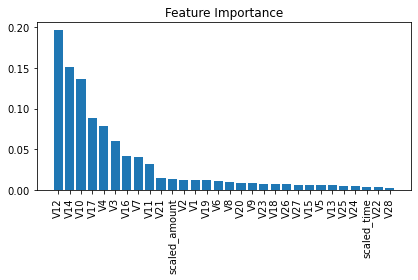

In [52]:
imp=rf_model.feature_importances_
plt.title('Feature Importance')
sorted_indices = np.argsort(imp)[::-1]
#first_ten=sorted_indices
plt.bar(range(len(sorted_indices)), imp[sorted_indices], align='center')
plt.xticks(range(len(sorted_indices)), x_train.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

The principal component, V12 seems to be the most important and V28 the least one. The amount can definitely be considered as an important factor

Ensemble Method
->Voting Classifier
	Hard Voting
	Combining the above 3 models with voting='hard'

In [58]:
svm1= SVC(kernel='linear', gamma='auto',C=0.1,probability=True, random_state=42)
voting_model = VotingClassifier(estimators=[('lr', lr_model), ('svc', svm1),('rf', rf_model)],
        voting='hard')
voting_model.fit(x_train, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=0.1,
                                                 multi_class='multinomial')),
                             ('svc',
                              SVC(C=0.1, gamma='auto', kernel='linear',
                                  probability=True, random_state=42)),
                             ('rf',
                              RandomForestClassifier(max_depth=10,
                                                     n_estimators=50))])

Soft Voting
Combining the above 3 models with voting='soft'

In [59]:
voting_model_soft = VotingClassifier(estimators=[('lr', lr_model), ('svc', svm1),('rf', rf_model)],
        voting='soft')
voting_model_soft.fit(x_train, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=0.1,
                                                 multi_class='multinomial')),
                             ('svc',
                              SVC(C=0.1, gamma='auto', kernel='linear',
                                  probability=True, random_state=42)),
                             ('rf',
                              RandomForestClassifier(max_depth=10,
                                                     n_estimators=50))],
                 voting='soft')

In [61]:
for i in (lr_model,svm_model, rf_model, voting_model, voting_model_soft ):
    
   # pred_x_val=i.predict(x_val)
    print(i, ': ',i.score(x_val,y_val))

LogisticRegression(C=0.1, multi_class='multinomial') :  0.9084507042253521
SVC(C=0.1, gamma='auto', kernel='linear') :  0.8943661971830986
RandomForestClassifier(max_depth=10, n_estimators=50) :  0.9084507042253521
VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=0.1,
                                                 multi_class='multinomial')),
                             ('svc',
                              SVC(C=0.1, gamma='auto', kernel='linear',
                                  probability=True, random_state=42)),
                             ('rf',
                              RandomForestClassifier(max_depth=10,
                                                     n_estimators=50))]) :  0.9014084507042254
VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=0.1,
                                                 multi_class='multinomial')),
                             ('svc',
                              

Voting Classifier with Soft voting has the best validation accuracy over the rest. It has outperformed all the individual classifiers and voting classifier with hard voting.

Predicting the test data with the Voting classifier(soft)

In [62]:
pred_testdata=voting_model_soft.predict(x_test)
print(voting_model_soft, ': ',accuracy_score(y_test,pred_testdata))

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=0.1,
                                                 multi_class='multinomial')),
                             ('svc',
                              SVC(C=0.1, gamma='auto', kernel='linear',
                                  probability=True, random_state=42)),
                             ('rf',
                              RandomForestClassifier(max_depth=10,
                                                     n_estimators=50))],
                 voting='soft') :  0.9436619718309859


The ensemble has a testing accuracy of 0.94!!

Consolidation of performace of different models
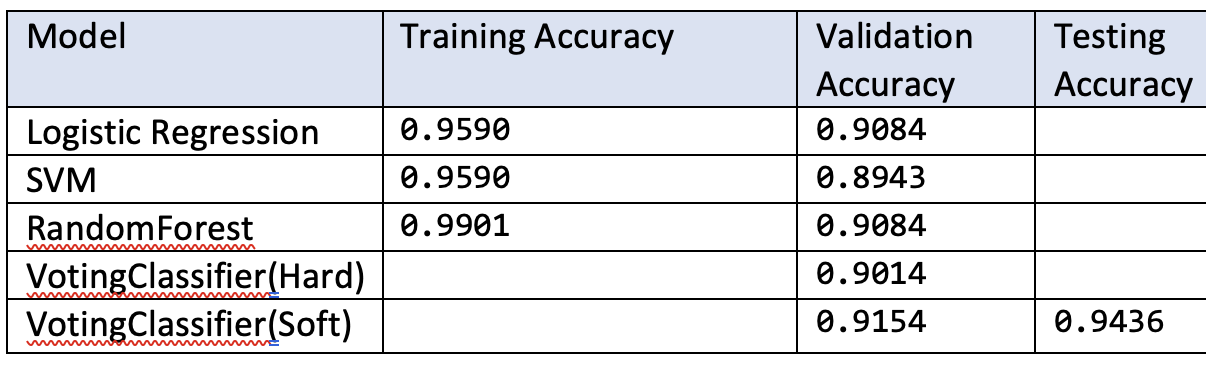

In [63]:
conf_mx = confusion_matrix(y_test, pred_testdata)

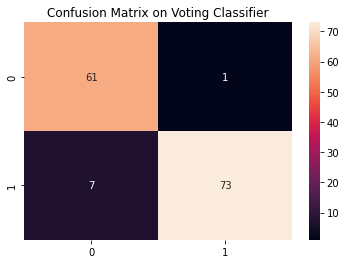

In [64]:
plt.title("Confusion Matrix on Voting Classifier")
sns.heatmap(conf_mx, annot=True)
plt.show()

The model got 8 transactions wrong- 1 was predicted as fraudulent when in fact it was a normal transaction (false positive) and 7 fraudulent transactions failed to be identified (false negative). Let's look at these 7 transactions to see what caused it to be unidentified.
May be the training data wasn't representative of this set. Checking the data concentrating on primary identifiers like V1, V3, V4, V7, V10, V11, V12, V14, V17, amount.

In [65]:
False_negatives= x_test[(y_test == 1)& (pred_testdata == 0)]

In [67]:
False_negatives.describe() 

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,scaled_amount,scaled_time
count,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,...,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
mean,-0.731851,-0.009643,0.344359,1.519561,0.090613,-0.336912,0.873689,-0.462445,0.173289,-0.042641,...,0.064287,0.060958,0.217945,0.033426,0.079074,-0.139204,-0.417239,0.088123,0.347104,-0.720996
std,1.675806,1.244112,1.134643,1.086017,0.692122,0.728344,0.597615,0.896233,0.693512,1.552316,...,0.422832,0.601434,0.547469,0.407400,0.398145,0.423060,0.941466,0.186771,0.798040,0.936752
min,-2.830984,-1.632441,-2.096888,0.317131,-1.249091,-1.347462,0.053558,-2.451050,-0.765054,-1.474974,...,-0.502636,-1.047398,-0.208574,-0.438908,-0.527114,-0.613874,-2.532445,-0.177587,-0.349231,-1.633966
25%,-1.946309,-1.154090,0.364062,0.803756,-0.143195,-0.825112,0.493334,-0.349283,-0.314799,-0.796931,...,-0.204523,-0.164586,-0.169389,-0.297720,-0.199610,-0.361428,-0.204462,0.002053,-0.285402,-1.177672
50%,-0.481531,0.885657,0.647117,0.905586,0.321669,-0.214415,0.780731,-0.161518,0.069736,-0.550545,...,0.070633,0.192491,-0.056752,-0.029091,0.239259,-0.159361,-0.039456,0.049819,0.065810,-0.977801
75%,0.379727,0.963961,0.966116,2.391324,0.514369,0.099391,1.263551,-0.043523,0.746466,0.037902,...,0.340202,0.387495,0.474882,0.336916,0.349681,-0.088757,-0.000193,0.191781,0.779288,-0.650487
max,1.322724,1.059542,1.199930,3.024050,0.819368,0.654937,1.767760,0.161064,1.045007,3.245086,...,0.610654,0.835795,1.179955,0.623590,0.541235,0.699175,0.060540,0.356958,1.725376,1.221110


In [69]:
x_train.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,scaled_amount,scaled_time
count,708.000000,708.000000,708.000000,708.000000,708.000000,708.000000,708.000000,708.000000,708.000000,708.000000,...,708.000000,708.000000,708.000000,708.000000,708.000000,708.000000,708.000000,708.000000,708.000000,708.000000
mean,-2.321206,1.846223,-3.513286,2.292141,-1.609576,-0.759971,-2.808441,0.354905,-1.341410,-2.795919,...,0.373843,0.009799,-0.046527,-0.093349,0.032034,0.037232,0.135213,0.030953,0.046372,-0.171392
std,5.479934,3.577768,6.156776,3.220872,4.177363,1.703501,5.718279,4.819996,2.306393,4.509369,...,2.769231,1.155098,1.260093,0.574683,0.694923,0.482277,0.928711,0.405303,0.856908,1.004992
min,-30.552380,-7.449015,-31.103685,-3.359270,-22.105532,-6.406267,-43.557242,-41.044261,-13.320155,-24.588262,...,-22.797604,-8.887017,-19.254328,-2.303772,-4.781606,-1.283678,-7.263482,-1.796363,-0.353229,-1.993845
25%,-2.782318,-0.171755,-5.120349,-0.138039,-1.848596,-1.663360,-3.066415,-0.189197,-2.328735,-4.639797,...,-0.175416,-0.521657,-0.241989,-0.421014,-0.294088,-0.288127,-0.043421,-0.053228,-0.348072,-1.062138
50%,-0.730752,0.969732,-1.436900,1.304940,-0.553332,-0.656655,-0.696449,0.161000,-0.753107,-0.856491,...,0.173757,0.056418,-0.035984,-0.012331,0.072354,-0.007291,0.059390,0.034354,-0.281264,-0.339514
75%,1.084110,2.930212,0.333867,4.213989,0.452901,0.047044,0.194417,0.902857,0.115886,0.047110,...,0.659955,0.586890,0.180357,0.336035,0.399402,0.352495,0.472290,0.209606,0.046539,0.832607
max,2.332879,22.057729,3.555539,12.114672,11.095089,6.474115,5.431271,20.007208,5.718008,10.035865,...,27.202839,8.316275,5.466230,1.230346,2.208209,2.917823,3.052358,1.779364,8.146182,1.639173


In [75]:
#pd.concat(False_negatives['V12'], x_train['V12'])
pd.concat([False_negatives.V12.describe(), x_train.V12.describe()],  axis=1)

,V12,V12
count,7.000000,708.000000
mean,-0.760605,-3.106549
std,1.004901,4.610610
min,-2.776757,-18.683715
25%,-0.791680,-5.597877
50%,-0.677096,-0.793164
75%,-0.385022,0.236025
max,0.483019,2.736815


In [77]:
pd.concat([False_negatives.V17.describe(), x_train.V17.describe()],  axis=1)

,V17,V17
count,7.000000,708.000000
mean,0.651137,-3.347499
std,0.714806,6.071558
min,-0.119204,-25.162799
25%,0.150094,-5.248763
50%,0.327006,-0.590031
75%,1.171471,0.256088
max,1.707024,6.739384


In [78]:
True_positives= x_test[(y_test == 1)& (pred_testdata == 1)]

In [79]:
pd.concat([True_positives.V17.describe(), x_train.V17.describe()],  axis=1)

,V17,V17
count,73.000000,708.000000
mean,-7.992931,-3.347499
std,6.379278,6.071558
min,-21.906493,-25.162799
25%,-12.845657,-5.248763
50%,-7.140326,-0.590031
75%,-2.892555,0.256088
max,3.871618,6.739384


Certain determining factors like V17, V12 etc are a bit far apart in the false negatives data and the training data. Whereas the true positives have it almost in the same range indicating the reason for the false negative transactions to be incorrectly classisified.
More fraudulent transactions for training could probably increase the accuracy even more.